In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


In [4]:
fashion_mnist  = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 4s 1us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

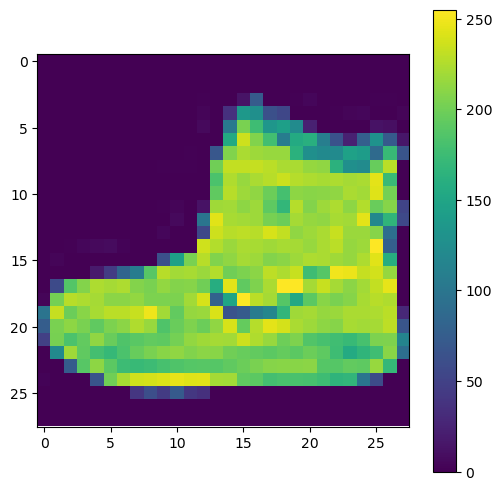

In [11]:
plt.figure(figsize = (6,6))
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10)
])




In [16]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])


model.fit(train_images, train_labels, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2291 - accuracy: 0.9130
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2214 - accuracy: 0.9157
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2137 - accuracy: 0.9187
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2071 - accuracy: 0.9213
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2021 - accuracy: 0.9235
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1976 - accuracy: 0.9254
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1903 - accuracy: 0.9276
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1852 - accuracy: 0.9298
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1815 - accuracy: 0.9319
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.177

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print("Test Accuracy : ", test_acc)



313/313 - 1s - loss: 0.4130 - accuracy: 0.8860 - 668ms/epoch - 2ms/step
Test Accuracy :  0.8859999775886536


In [19]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [21]:
predictions[0]

array([1.7789237e-11, 2.4300402e-11, 5.2747390e-13, 9.5194896e-17,
       4.3147408e-14, 4.4632111e-09, 1.1801831e-14, 6.4219152e-05,
       1.0443544e-18, 9.9993575e-01], dtype=float32)

In [24]:
print("Prediction array:", predictions[0])

print("Label with highest confidence:", np.argmax(predictions[0]))

img = test_images[0]
img = (np.expand_dims(img, 0))

predictions_single = probability_model.predict(img)

print("Prediction for single image:", predictions_single)
print("Label with highest confidence for single image:", np.argmax(predictions_single[0]))

Prediction array: [1.7789237e-11 2.4300402e-11 5.2747390e-13 9.5194896e-17 4.3147408e-14
 4.4632111e-09 1.1801831e-14 6.4219152e-05 1.0443544e-18 9.9993575e-01]
Label with highest confidence: 9
1/1 [==============================] - 0s 38ms/step
Prediction for single image: [[1.7789339e-11 2.4300586e-11 5.2747693e-13 9.5195260e-17 4.3147570e-14
  4.4632111e-09 1.1801876e-14 6.4219152e-05 1.0443544e-18 9.9993575e-01]]
Label with highest confidence for single image: 9


In [27]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

fashion_mist = fetch_openml('Fashion-MNIST')
X, y = fashion_mnist.target
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


AttributeError: module 'keras.api._v2.keras.datasets.fashion_mnist' has no attribute 'target'